## Unknown Amplitude

### Random Amplitude in Wireless Channels

In many radio systems, the amplitude of the received signal is not fixed but instead varies randomly due to channel conditions. 

A prominent example of this is the multipath fading channel, where signals travel between the transmitter and receiver along multiple propagation paths. 

The superposition of these paths causes the received signal's amplitude to fluctuate due to mutual interference, which can be either constructive or destructive, depending on the relative phases and delays of the arriving signals.

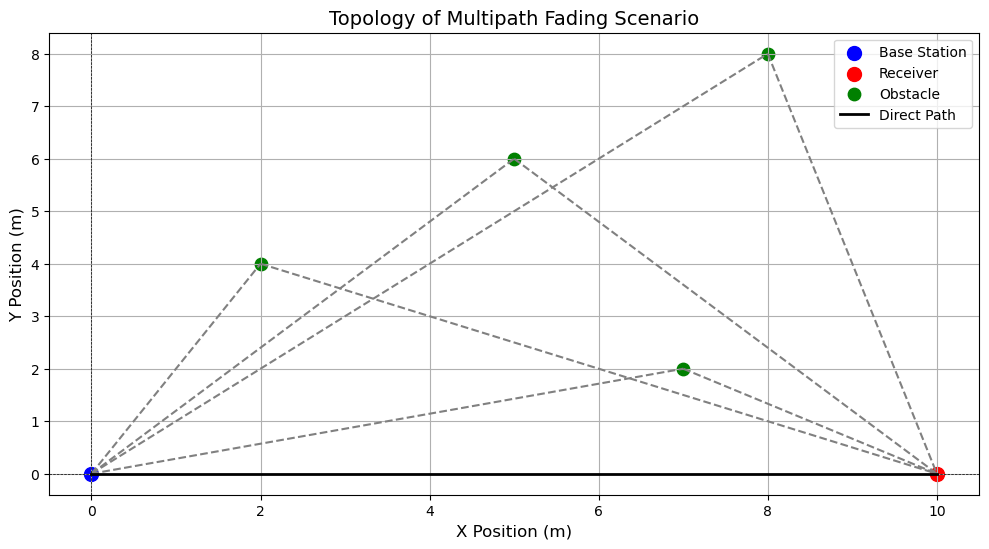

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the topology of the multipath scenario

plt.figure(figsize=(12, 6))

# Base station and receiver positions
base_station = [0, 0]
receiver = [10, 0]

# Define the paths as reflections from obstacles
obstacles = [[2, 4], [5, 6], [7, 2], [8, 8]]

# Plot the base station and receiver
plt.scatter(*base_station, color='blue', label="Base Station", s=100)
plt.scatter(*receiver, color='red', label="Receiver", s=100)

# Plot obstacles and paths
for i, obstacle in enumerate(obstacles):
    plt.scatter(*obstacle, color='green', label="Obstacle" if i == 0 else None, s=80)
    plt.plot([base_station[0], obstacle[0]], [base_station[1], obstacle[1]], linestyle="--", color="gray")
    plt.plot([obstacle[0], receiver[0]], [obstacle[1], receiver[1]], linestyle="--", color="gray")

# Direct path
plt.plot([base_station[0], receiver[0]], [base_station[1], receiver[1]], color="black", linewidth=2, label="Direct Path")

# Labels and legend
plt.title("Topology of Multipath Fading Scenario", fontsize=14)
plt.xlabel("X Position (m)", fontsize=12)
plt.ylabel("Y Position (m)", fontsize=12)
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
plt.legend()
plt.grid()

plt.show()


#### Examples of Multipath Fading Channels

1. **High-Frequency (HF) Skywave Channel**  
   This channel enables communication between geographically distant locations by refracting radio waves through the Earth's ionosphere. 
   
   The multipath effect arises due to the relatively wide beamwidths of antennas and natural irregularities in the ionosphere.

2. **Troposcatter Channel**  
   Communication over long distances is facilitated in this channel by the scattering of radio waves from atmospheric molecules within the Earth's troposphere.

3. **High-Resolution Radar Systems**  
   In these systems, the received signal consists of multiple reflections from different sections of the target, leading to multipath effects.

4. **Mobile Radio Communication Channel**  
   Here, the received signal is often a combination of a direct path and several reflected paths caused by nearby structures, such as buildings or vehicles.

Given the characteristics of these channels, estimating the phase of the received signal is typically impractical or infeasible. 

As a result, both the *amplitude* and *phase* of the received signal must be treated as random variables.

### Review Conditional Probabilites

#### Compute $ f(X|Y) $

Using the marginalization equation:

$$
f(X|Y) = \int f(X|Y, Z = z) \cdot f_Z(z) \, dz 
$$

#### Compute $ f(X) $

Using the marginalization equation:

$$
f(X) = \int f(X|Y = y) \cdot f_Y(y) \, dy
$$

#### Applications in Our Problem

We have that 

$$
p_i(\vec{y}|\alpha_i) = \int p_i(\vec{y}|\alpha_i, \beta_i) \cdot f_{\boldsymbol{\beta}_i}(\beta_i) \, d\beta_i
$$

where

- **$ \vec{y} $**: Observed signal vector
- **$ \alpha_i $**: Amplitude parameter
- **$ \beta_i $**: Phase parameter (unknown and uniformly distributed)
- **$ f_{\boldsymbol{\beta}_i}(\beta_i) $**: Uniform distribution of $ \beta_i $, epresenting the *prior distribution* of $ \beta_i $.

By integrating out $ \beta_i $, we obtain the marginal conditional density $ p_i(\vec{y}|\alpha_i) $, which accounts for all possible phases $ \beta_i $.

#### Compute $ p_i(\vec{y}) $

To find the unconditional PDF $ p_i(\vec{y}) $, we marginalize over the random variable $ \alpha_i $:

$$
p_i(\vec{y}) = \int p_i(\vec{y}|\alpha_i) \cdot p_{\boldsymbol{\alpha}_i}(\alpha_i) \, d\alpha_i
$$

where

- **$ p_i(\vec{y}|\alpha_i) $**: The conditional PDF of $ \vec{y} $ given $ \alpha_i $.
- **$ p_{\boldsymbol{\alpha}_i}(\alpha_i) $**: The marginal PDF of $ \alpha_i $, representing the *prior distribution* of $ \alpha_i $.

This integral effectively **averages** the conditional densities $ p_i(\vec{y}|\alpha_i) $ over the distribution of $ \alpha_i $, yielding the unconditional density $ p_i(\vec{y}) $.


### Signal Modelling

Using the derivations in the previous section, we can rewrite the vector form of the signal as 

$$
\vec{y} = \alpha_i \vec{u}_i e^{j \beta_i} + \vec{z}
$$

where $ \alpha_i $ represents the amplitude under hypothesis $ H_i $. 

### Conditional Density Functions

Assuming the noise is white with a correlation matrix of $ \sigma_z^2 I $, the conditional density functions are

$$
p_i(\vec{y} | \alpha_i, \beta_i) = \frac{1}{(2\pi\sigma_z^2)^k} \exp \left( -\frac{1}{2\sigma_z^2} \left[ \vec{y} - \alpha_i \vec{u}_i e^{j \beta_i} \right]^T \left[ \vec{y}^* - \alpha_i \vec{u}_i^* e^{-j \beta_i} \right] \right), \quad i = 0, 1
$$

which can be written as

$$
\begin{align*}
p_i(\vec{y} | \alpha_i, \beta_i) 
= \frac{1}{(2\pi\sigma_z^2)^k} 
&\exp \left( -\frac{1}{2\sigma_z^2} \sum_{j=1}^k |y_j|^2 \right) \\
\times &\exp \left( \frac{\alpha_i}{\sigma_z^2} \left| \sum_{j=1}^k y_j u_{ij}^* \right| \cos(\beta_i - \xi_i) \right) \\
\times &\exp \left( -\frac{\alpha_i^2}{2\sigma_z^2} \sum_{j=1}^k |u_{ij}|^2 \right), \quad i = 0, 1
\end{align*}
$$


#### Unknown Uniform Phase

Assuming the phases $ \beta_i $ are each uniform on the interval $ (0, 2\pi) $.

We arrive at a conditional density function (from the derivation in the previous section):

$$
\begin{align*}
p_i(\vec{y}|\alpha_i) = \frac{1}{(2\pi\sigma_z^2)^k} 
&\exp \left( -\frac{1}{2\sigma_z^2} \sum_{j=1}^k |y_j|^2 \right) \\
\times &I_0 \left( \frac{\alpha_i}{\sigma_z^2} \left| \sum_{j=1}^k y_j u_{ij}^* \right| \right) \\
\times &\exp \left( -\frac{\alpha_i^2}{2\sigma_z^2} \sum_{j=1}^k |u_{ij}|^2 \right), \quad i = 0, 1
\end{align*}
$$

#### Unknown Rician Amplitude

In order to proceed further, we must find a useful and appropriate density function for $ p(\alpha_i) $ so that we can determine the unconditional pdf

$$
p_i(\vec{y}) = \int p(\vec{y}|\alpha_i) p(\alpha_i) d\alpha_i
$$

One general and appropriate model for the amplitude density function is a Rician, *i.e.,*

$$
\boxed{
p(\alpha_i) = \frac{\alpha_i}{\sigma_i^2} \exp \left( -\frac{1}{2\sigma_i^2} \left( \alpha_i^2 + \Upsilon_i^2 \right) \right) I_0 \left( \frac{\alpha_i \Upsilon_i}{\sigma_i^2} \right)
}
$$


where $ \Upsilon_i^2 $ is proportional to the power if the multipath signal contains any nonstochastic or direct components and $ \sigma_i^2 $ is proportional to the random multipath power. 

If $ \Upsilon_i = 0 $, the density function is a Rayleigh, corresponding to the generally well-known Rayleigh fading channel. 

Many authors have used the Rician or Rayleigh fading channels to accurately model "real" channels of interest.

Using the Rician pdf $p(\alpha_i)$, we can write the unconditional density function as

$$
\begin{align*}
p_i(\vec{y}) 
= \frac{1}{(2\pi\sigma_z^2)^k} &\exp \left( -\frac{1}{2\sigma_z^2} \sum_{j=1}^k |y_j|^2 - \frac{\Upsilon_i^2}{2\sigma_i^2} \right) \\
\times \int_0^{\infty} \bigg[\frac{\alpha_i}{\sigma_i^2} &\exp \left( -\alpha_i^2 \left[ \frac{1}{2\sigma_z^2} \sum_{j=1}^k |u_{ij}|^2 + \frac{1}{2\sigma_i^2} \right] \right) \\
\times &I_0 \left( \frac{\alpha_i}{\sigma_z^2} \left| \sum_{j=1}^k y_j u_{ij}^* \right| \right) I_0 \left( \frac{\alpha_i \Upsilon_i}{\sigma_i^2} \right) 
\bigg] d\alpha_i, \quad i = 0, 
\end{align*}
$$


The integral is evaluated as

$$\boxed{
\int_0^{\infty} \alpha \exp(-c \alpha^2) I_0(g \alpha) I_0(e \alpha) \, d\alpha = \frac{1}{2c} \exp \left[ \frac{g^2 + e^2}{4c} \right] I_0 \left( \frac{g e}{2c} \right)
}
$$

so that the unconditional density function is

$$
\boxed{
\begin{align*}
p_i(\vec{y}) 
&= \frac{1}{(2\pi)^{k} \sigma_z^{2k} \sigma_i^2} \exp \left( -\frac{1}{2\sigma_z^2} \sum_{j=1}^k |y_j|^2 - \frac{\Upsilon_i^2}{2\sigma_i^2} \right) \\
&\times \frac{1}{2c_i} \exp \left[ \frac{g_i^2 + \Upsilon_i^2}{4c_i} \right] I_0 \left( \frac{g_i \Upsilon_i}{2c_i} \right), \quad i = 0, 1
\end{align*}
}
$$

where

$$
c_i = \frac{1}{2\sigma_z^2} \sum_{j=1}^k |u_{ij}|^2 + \frac{1}{2\sigma_i^2}
$$

the random variable $ g_i $ is

$$
g_i = \frac{1}{\sigma_z^2} \left| \sum_{j=1}^k y_j u_{ij}^* \right|
$$

and

$$
e_i = \frac{\Upsilon_i}{\sigma_i^2}
$$

### Likelihood Ratio

It follows that the likelihood ratio is

$$
\begin{align*}
L(\vec{y}) = &\exp \left( \frac{\Upsilon_0^2}{2\sigma_0^2} - \frac{\Upsilon_1^2}{2\sigma_1^2} \right) \frac{c_0 \sigma_0^2}{c_1 \sigma_1^2} \\
\times &\exp \left( \frac{g_1^2 + e_1^2}{4c_1} - \frac{g_0^2 + e_0^2}{4c_0} \right) \frac{I_0 \left( \frac{g_1 e_1}{2c_1} \right)}{I_0 \left( \frac{g_0 e_0}{2c_0} \right)}
\end{align*}
$$

Although the derivation can proceed somewhat further, it is more instructive to limit it to practical situations. 

For example, since the channel attenuation introduces a random amplitude, signals would normally be chosen to have equal energy, *i.e.,*

$$
\frac{1}{2} \sum_{j=1}^k |u_{1j}|^2 = \frac{1}{2} \sum_{j=1}^k |u_{0j}|^2 = \mathcal{E}
$$

Furthermore, if the signals under both hypotheses traverse the same channel, then

$$
\Upsilon_1 = \Upsilon_0 = \Upsilon
$$

and

$$
\sigma_0^2 = \sigma_1^2 = \sigma_r^2
$$

Taken together, these restrictions imply

$$
c_0 = c_1 = c = \frac{\mathcal{E}}{\sigma_z^2} + \frac{1}{2\sigma_r^2}
$$

and

$$
e_0 = e_1 = e = \frac{\Upsilon}{\sigma_r^2}
$$

from which, $L(\vec{y})$  can be simplified to

$$
\boxed{
L(\vec{y}) = \exp \left( \frac{g_1^2 - g_0^2}{4c} \right) \frac{I_0 \left( \frac{e}{2c} g_1 \right)}{I_0 \left( \frac{e}{2c} g_0 \right)}
}
$$

or the log-likelihood ratio is

$$
\boxed{
\ell(\vec{y}) = \frac{1}{4c} g_1^2 + \ln I_0 \left( \frac{e}{2c} g_1 \right) - \frac{1}{4c} g_0^2 - \ln I_0 \left( \frac{e}{2c} g_0 \right)
}
$$

### Recevier Structure

Using the preceding equation, we see that Figure 6.10 shows an optimal binary digital receiver under these conditions. 

![Fig. 6.10](./Figures/fig_6_10.png)

From the figure, it can be seen that, even though it is not necessary to know the random amplitude $ \alpha $, in order to implement this receiver it is necessary to know its statistical parameters $ \sigma_r^2 $ and $ \Upsilon $.

Actually, in this case of equal channel conditions, it is unnecessary to implement the receiver of Figure 6.10. 

A careful inspection of the receiver indicates that, since the term $ c $ is positive and $ e $ is nonnegative, when one of the decision variables, e.g., $ U_1 $, is greater than the other, $ U_0 $, then $ g_1 > g_0 $, and vice versa. It follows that the receiver of Figure 6.4 is also optimal in this case.


### Receiver Structure

Figure 6.10 illustrates the optimal binary digital receiver for the described conditions, as derived from the preceding equation.

![Fig. 6.10](./Figures/fig_6_10.png)

The figure demonstrates that while it is unnecessary to explicitly know the random amplitude $ \alpha $ to implement the receiver, knowledge of its statistical parameters $ \sigma_r^2 $ and $ \Upsilon $ is essential.

However, under equal channel conditions, implementing the receiver of Figure 6.10 becomes redundant. 

Upon closer examination, it is evident that since the term $ c $ is positive and $ e $ is nonnegative, the decision-making simplifies. 

When one decision variable, e.g., $ U_1 $, is greater than the other, $ U_0 $, it implies that $ g_1 > g_0 $, and vice versa. 

Consequently, the receiver depicted in Figure 6.4 remains optimal in this scenario as well.

### Performance Analysis

The performance of a receiver structure such as Figure 6.4 in conditions of variable received-signal amplitude $ \alpha $ can be determined analytically under the following conditions. 

In the section of Unknown Phase, we found this structure’s error-rate performance under conditions of constant amplitude $ \alpha $. 

If the channel conditions change slowly with respect to the signaling rate $ 1/T $, then the error rates can be considered as conditional probabilities, conditioned on the amplitude $ \alpha $. 

For example, **if orthogonal signaling is used**, the error rate from the section of unknown phase is

$$
\Pr(\text{error}|\alpha) = \frac{1}{2} \exp \left( -\frac{\alpha^2 \mathcal{E}}{\sigma_z^2} \right)
$$

Given Rician amplitude, it follows that the unconditional error rate is

$$
\Pr(\text{error}) = \int_0^{\infty} \frac{1}{2} \exp \left( -\frac{\alpha^2 \mathcal{E}}{\sigma_z^2} \right) \frac{\alpha}{\sigma_r^2} \exp \left( -\frac{1}{2\sigma_r^2} \left[ \alpha^2 + \Upsilon^2 \right] \right) I_0 \left( \frac{\alpha \Upsilon}{\sigma_r^2} \right) d\alpha
$$


Apter some calculation steps, we have

$$\boxed{
\Pr(\text{error}) = \frac{1}{2 \left( 1 + \frac{2\sigma_r^2 \mathcal{E}}{\sigma_z^2} \right)} \exp \left( -\frac{\mathcal{E}}{\sigma_z^2} \frac{\Upsilon^2}{1 + \frac{2\sigma_r^2 \mathcal{E}}{\sigma_z^2}} \right)
}
$$

#### Special Case of Rayleigh Channel


For a Rayleigh fading channel:
- The received signal does not have a deterministic line-of-sight (LOS) component.
- As a result, the **mean received signal strength** (i.e., the deterministic component $\Upsilon$) is zero, i.e., $ \Upsilon = 0$.


If $ \Upsilon = 0 $, the exponential term becomes:

$$
\exp\left(-\frac{\mathcal{E}}{\sigma_z^2} \frac{\Upsilon^2}{1 + \frac{2\sigma_r^2 \mathcal{E}}{\sigma_z^2}}\right) = \exp(0) = 1.
$$

Thus, the probability of error simplifies to:

$$
\Pr(\text{error}) = \frac{1}{2 \left( 1 + \frac{2\sigma_r^2 \mathcal{E}}{\sigma_z^2} \right)}.
$$

Consiser the general likelihood ratio above, if one of the hypotheses, say $ H_0 $, corresponds to the "radar problem" of noise only, it is straightforward to show that the likelihood ratio is

$$
L(\vec{y}) = \exp \left( \frac{g_1^2 + e_1^2}{4c_1} \right) I_0 \left( \frac{g_1 e_1}{2c_1} \right) \left[ \frac{1}{2c_1 \sigma_1^2} \exp \left( -\frac{\Upsilon^2}{2\sigma_r^2} \right) \right]
$$

The term in square brackets in this equation is a constant, which can be predetermined and incorporated in the decision threshold. 